# Dataset for mosquito collections on Big Pine Key, Florida, USA

In [1]:
import pandas as pd
import numpy as np
import datetime

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
florida = pd.read_csv('https://raw.githubusercontent.com/Zhengnan817/capstone/main/Dataset/florida_1998_to_2019.csv')
temperature = pd.read_csv('https://raw.githubusercontent.com/Juanfra21/mosquito-population-model/main/data/weather_data.csv')

In [3]:
temperature = temperature[['datetime', 'humidity', 'temp', 'precip','windspeed']]

# Temperature

In [4]:
# Now create the DATE column without spaces in the names
temperature['datetime'] = pd.to_datetime(temperature['datetime'], errors='coerce')
temperature.rename(columns={'datetime': 'Date'}, inplace=True)
temperature

,Date,humidity,temp,precip,windspeed
0,1998-01-01,64.1,16.5,0.000,37.0
1,1998-01-02,72.3,19.8,0.000,34.5
2,1998-01-03,82.9,21.6,0.000,31.2
3,1998-01-04,89.2,22.7,0.300,36.2
4,1998-01-05,90.5,23.4,0.000,24.2
...,...,...,...,...,...
8030,2019-12-27,78.5,25.2,0.451,21.5
8031,2019-12-28,81.5,25.6,0.000,18.6
8032,2019-12-29,82.3,25.8,1.442,22.8
8033,2019-12-30,85.3,25.3,3.144,20.8


# Mosquito abundance

In [5]:
florida

,YEAR,DOY,TAEN,DEIN,NIGR,ATRO,QUIN,CRUC,BAHA,INFI,...,ALBI,COND,MULR,PILO,DECL,INOR,GRAB,TITI,UNID,TOTAL
0,1998,232,"1,272.00",76,4,0,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1,354.00"
1,1998,237,"4,792.00",48,24,0,NaN,0,0,24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"5,008.00"
2,1998,244,"4,000.00",0,0,0,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"4,000.00"
3,1998,251,488,0,0,1,NaN,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,490
4,1998,253,"1,324.00",4,0,8,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1,336.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,2019,56,404,12,0,1,0.0,0,1,0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,435
994,2019,64,21,1,0,1,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23
995,2019,70,32,2,0,2,0.0,0,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39
996,2019,77,206,4,0,16,0.0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,227


In [6]:
florida['TOTAL'] = florida['TOTAL'].str.replace(',', '').astype(float)

# 显示结果验证转换是否正确
print(florida[['YEAR', 'DOY', 'TOTAL']])

     YEAR  DOY   TOTAL
0    1998  232  1354.0
1    1998  237  5008.0
2    1998  244  4000.0
3    1998  251   490.0
4    1998  253  1336.0
..    ...  ...     ...
993  2019   56   435.0
994  2019   64    23.0
995  2019   70    39.0
996  2019   77   227.0
997  2019   85     2.0

[998 rows x 3 columns]


In [7]:
# 定义一个函数将年和天转换为日期
def convert_to_date(row):
    return datetime.datetime(row['YEAR'], 1, 1) + datetime.timedelta(days=row['DOY'] - 1)

# 应用函数转换YEAR和DOY为日期
florida['Date'] = florida.apply(convert_to_date, axis=1)

# 查看转换后的结果
print(florida[['YEAR', 'DOY', 'Date']])

     YEAR  DOY       Date
0    1998  232 1998-08-20
1    1998  237 1998-08-25
2    1998  244 1998-09-01
3    1998  251 1998-09-08
4    1998  253 1998-09-10
..    ...  ...        ...
993  2019   56 2019-02-25
994  2019   64 2019-03-05
995  2019   70 2019-03-11
996  2019   77 2019-03-18
997  2019   85 2019-03-26

[998 rows x 3 columns]


In [8]:
# 选择需要的列
df_selected = florida[['Date', 'TOTAL']]

# 选择合并后的列和TOTAL列
florida = df_selected[['Date', 'TOTAL']]

florida

,Date,TOTAL
0,1998-08-20,1354.0
1,1998-08-25,5008.0
2,1998-09-01,4000.0
3,1998-09-08,490.0
4,1998-09-10,1336.0
...,...,...
993,2019-02-25,435.0
994,2019-03-05,23.0
995,2019-03-11,39.0
996,2019-03-18,227.0


# Merge the data

In [9]:
df = pd.merge(florida, temperature, on='Date', how='inner')


In [10]:
df

,Date,TOTAL,humidity,temp,precip,windspeed
0,1998-08-20,1354.0,73.1,29.5,0.000,30.7
1,1998-08-25,5008.0,70.4,29.9,0.000,21.2
2,1998-09-01,4000.0,73.0,29.7,0.000,14.8
3,1998-09-08,490.0,73.4,29.8,0.300,22.3
4,1998-09-10,1336.0,78.1,29.4,2.554,23.0
...,...,...,...,...,...,...
993,2019-02-25,435.0,75.3,26.3,0.000,23.8
994,2019-03-05,23.0,74.8,25.6,0.000,27.7
995,2019-03-11,39.0,71.3,26.8,0.000,19.2
996,2019-03-18,227.0,73.2,25.4,0.000,19.6


In [11]:
df.rename(columns={'TOTAL': 'abundance', 'meanTemp': 'temp'}, inplace=True)

# 查看更新后的DataFrame
df

,Date,abundance,humidity,temp,precip,windspeed
0,1998-08-20,1354.0,73.1,29.5,0.000,30.7
1,1998-08-25,5008.0,70.4,29.9,0.000,21.2
2,1998-09-01,4000.0,73.0,29.7,0.000,14.8
3,1998-09-08,490.0,73.4,29.8,0.300,22.3
4,1998-09-10,1336.0,78.1,29.4,2.554,23.0
...,...,...,...,...,...,...
993,2019-02-25,435.0,75.3,26.3,0.000,23.8
994,2019-03-05,23.0,74.8,25.6,0.000,27.7
995,2019-03-11,39.0,71.3,26.8,0.000,19.2
996,2019-03-18,227.0,73.2,25.4,0.000,19.6


In [12]:
df.describe()

,Date,abundance,humidity,temp,precip,windspeed
count,998,998.000000,998.000000,998.000000,998.000000,998.000000
mean,2008-10-13 20:40:52.905811712,498.892786,73.553908,25.615130,2.625591,23.397194
min,1998-08-20 00:00:00,0.000000,46.500000,9.300000,0.000000,8.700000
25%,2003-07-15 18:00:00,11.250000,69.800000,23.600000,0.000000,17.800000
50%,2008-10-23 12:00:00,58.000000,73.500000,26.100000,0.000000,22.600000
75%,2013-11-10 00:00:00,287.500000,78.100000,28.600000,1.110500,27.700000
max,2019-03-26 00:00:00,24192.000000,96.700000,30.900000,100.059000,97.500000
std,NaN,1641.873664,7.152550,3.625207,7.914449,8.082651


In [13]:
df.isna().sum()

Date         0
abundance    0
humidity     0
temp         0
precip       0
windspeed    0
dtype: int64

# Plot the data

In [14]:
def plot_total_vs_date(df):
    plt.figure(figsize=(10, 5))
    plt.plot(df['Date'], df['abundance'], marker='o', color='b', linestyle='-')
    plt.title('Abundance vs. Date')
    plt.xlabel('Date')
    plt.ylabel('Abundance')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

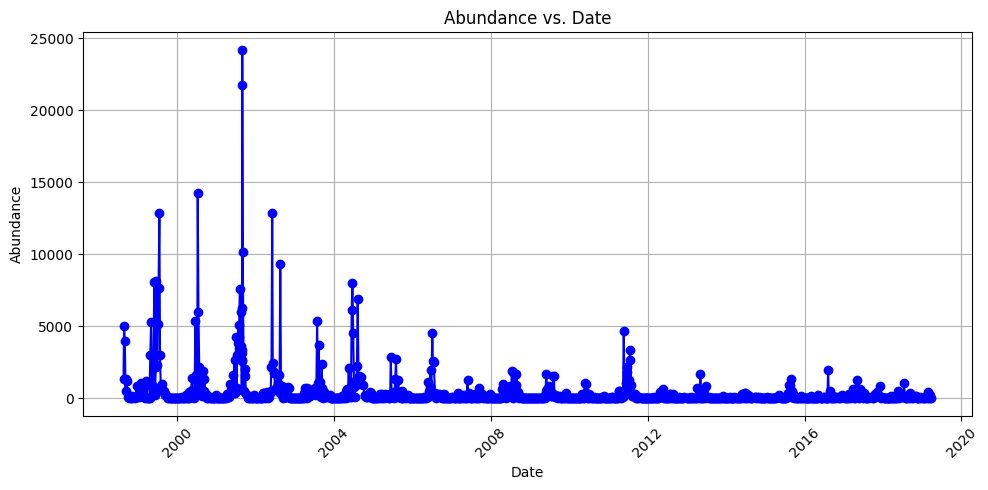

In [15]:
plot_total_vs_date(df)

In [16]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series, title=''):
    """Perform ADFuller test to check stationarity of a given series"""
    print(f'ADF Test on "{title}"')
    result = adfuller(series, autolag='AIC')
    labels = ['ADF test statistic', 'p-value', 'Lags used', 'Number of observations']
    out = pd.Series(result[0:4], index=labels)
    for key, val in result[4].items():
        out[f'Critical value ({key})'] = val
    print(out.to_string())
    print('\n')

# 逐个检查平稳性
for col in df.columns:
    adf_test(df[col], title=col)

ADF Test on "Date"
ADF test statistic          9.160177
p-value                     1.000000
Lags used                   5.000000
Number of observations    992.000000
Critical value (1%)        -3.436959
Critical value (5%)        -2.864458
Critical value (10%)       -2.568324


ADF Test on "abundance"
ADF test statistic       -6.645141e+00
p-value                   5.288761e-09
Lags used                 1.300000e+01
Number of observations    9.840000e+02
Critical value (1%)      -3.437013e+00
Critical value (5%)      -2.864482e+00
Critical value (10%)     -2.568336e+00


ADF Test on "humidity"
ADF test statistic       -7.481409e+00
p-value                   4.761546e-11
Lags used                 8.000000e+00
Number of observations    9.890000e+02
Critical value (1%)      -3.436979e+00
Critical value (5%)      -2.864467e+00
Critical value (10%)     -2.568328e+00


ADF Test on "temp"
ADF test statistic       -1.158934e+01
p-value                   2.816729e-21
Lags used                 

In [17]:
print(df.dtypes)
df = df.apply(lambda x: pd.to_numeric(x, errors='coerce') if x.dtype == 'object' else x)

# 再次检查数据类型确保转换正确
print(df.dtypes)

Date         datetime64[ns]
abundance           float64
humidity            float64
temp                float64
precip              float64
windspeed           float64
dtype: object
Date         datetime64[ns]
abundance           float64
humidity            float64
temp                float64
precip              float64
windspeed           float64
dtype: object


In [37]:
from statsmodels.tsa.vector_ar.var_model import VAR
# 拟合VAR模型
model_shift = VAR(df)
results = model_shift.fit(maxlags=15, ic='aic')  # 使用AIC标准选择最佳滞后
print(results.summary())

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 18, Nov, 2024
Time:                     15:05:19
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    14.6416
Nobs:                     989.000    HQIC:                   14.2427
Log likelihood:          -13808.6    FPE:                1.20022e+06
AIC:                      13.9980    Det(Omega_mle):     1.05417e+06
--------------------------------------------------------------------
Results for equation humidity
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const               38.983381         4.958065            7.863           0.000
L1.humidity          0.174495         0.038620            4.518           0.000
L1.temp             -0.580128         0.117128           -4.9

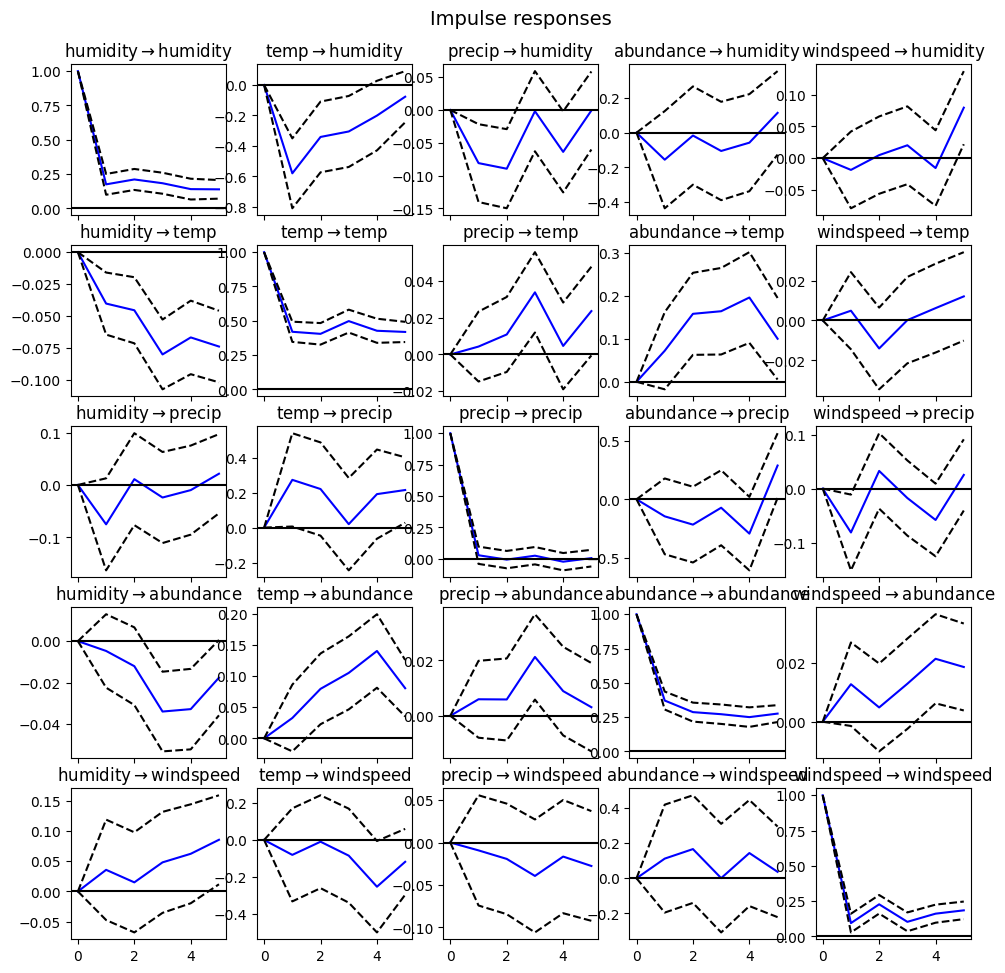

In [38]:
# 获得模型的脉冲响应函数图
irf = results.irf(5)  # 10期脉冲响应
irf.plot(orth=False)
plt.show()

Humidity to Abundance: Max response 0.0854 at lag 5


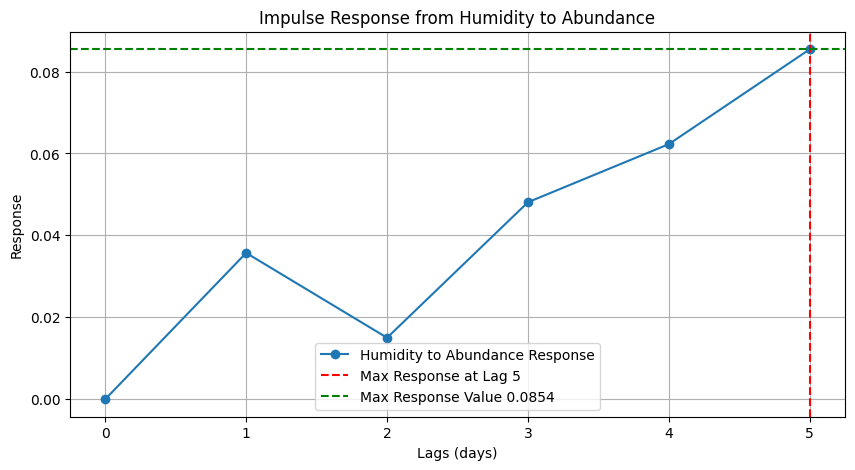

Temperature to Abundance: Max response -0.2529 at lag 4


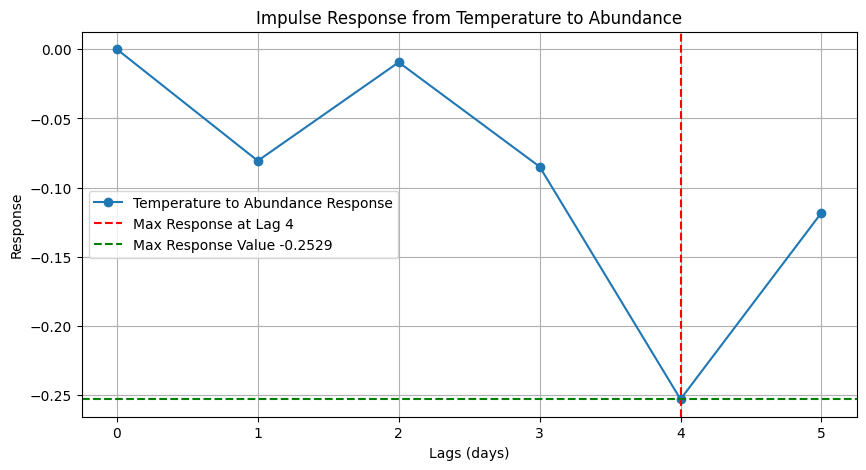

Precipitation to Abundance: Max response -0.0394 at lag 3


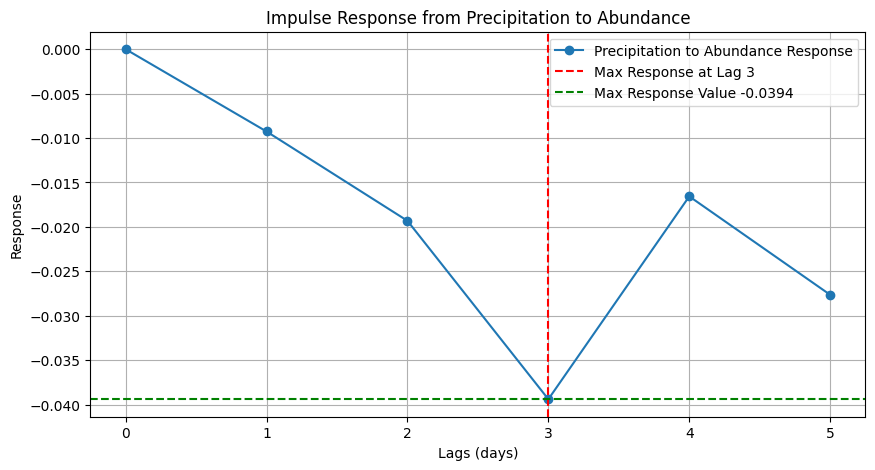

Windspeed to Abundance: Max response 0.1661 at lag 2


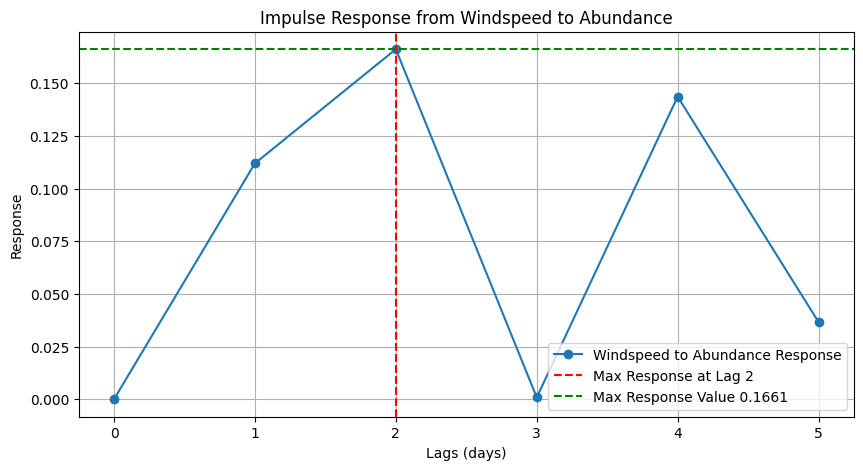

In [39]:
irf_data = irf.irfs
import numpy as np
import matplotlib.pyplot as plt

# 假设irf_data已经包含了从VAR模型计算得到的脉冲响应数据
variable_names = ['Humidity', 'Temperature', 'Precipitation', 'Windspeed']
response_index = 4  # 丰度的索引
variables_indices = [0, 1, 2, 3]  # 湿度、温度、降水、风速的索引

# 遍历所有环境变量，计算并可视化对丰度的脉冲响应
for var_idx, var_name in zip(variables_indices, variable_names):
    # 获取对丰度的脉冲响应数据
    irf_to_abundance = irf_data[:, response_index, var_idx]
    
    # 找出最大响应的滞后天数
    max_response_index = np.argmax(np.abs(irf_to_abundance))
    max_response_value = irf_to_abundance[max_response_index]
    
    # 打印结果
    print(f"{var_name} to Abundance: Max response {max_response_value:.4f} at lag {max_response_index}")
    
    # 可视化
    plt.figure(figsize=(10, 5))
    plt.plot(irf_to_abundance, marker='o', label=f'{var_name} to Abundance Response')
    plt.axvline(x=max_response_index, color='red', linestyle='--', label=f'Max Response at Lag {max_response_index}')
    plt.axhline(y=max_response_value, color='green', linestyle='--', label=f'Max Response Value {max_response_value:.4f}')
    plt.title(f'Impulse Response from {var_name} to Abundance')
    plt.xlabel('Lags (days)')
    plt.ylabel('Response')
    plt.legend()
    plt.grid(True)
    plt.show()


# Analysis the data

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:

# 调整DataFrame，包括滞后的数据
df['humidity_lag4'] = df['humidity'].shift(4)
df['temp_lag4'] = df['temp'].shift(4)
df['precip_lag3'] = df['precip'].shift(3)
df['windspeed_lag1'] = df['windspeed'].shift(1)

# 确保所有的滞后数据行都有值（删除包含NaN的行）
df.dropna(inplace=True)


Correlation Matrix:
           abundance  humidity      temp    precip  windspeed
abundance   1.000000  0.015927  0.232341 -0.013507  -0.039344
humidity    0.015927  1.000000  0.136556  0.284514  -0.111692
temp        0.232341  0.136556  1.000000  0.082170  -0.294610
precip     -0.013507  0.284514  0.082170  1.000000   0.045755
windspeed  -0.039344 -0.111692 -0.294610  0.045755   1.000000


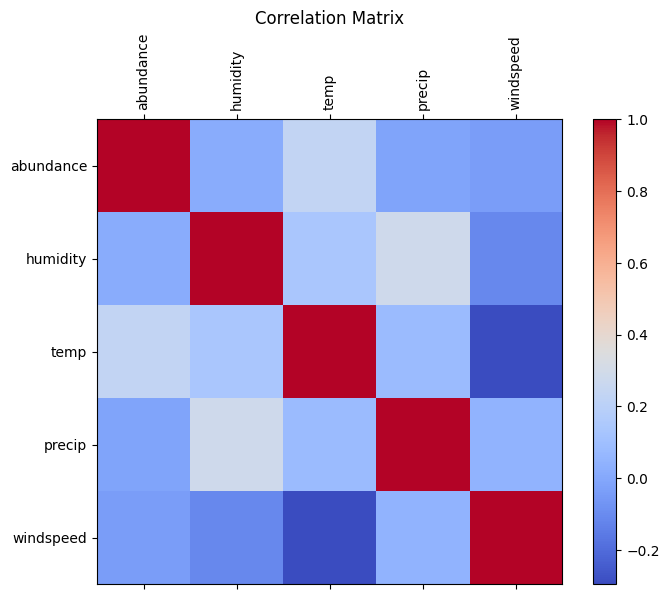

In [23]:
correlation_matrix = df[['abundance', 'humidity', 'temp', 'precip','windspeed']].corr()
print("Correlation Matrix:")
print(correlation_matrix)
plt.figure(figsize=(8, 6))
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix')
plt.show()

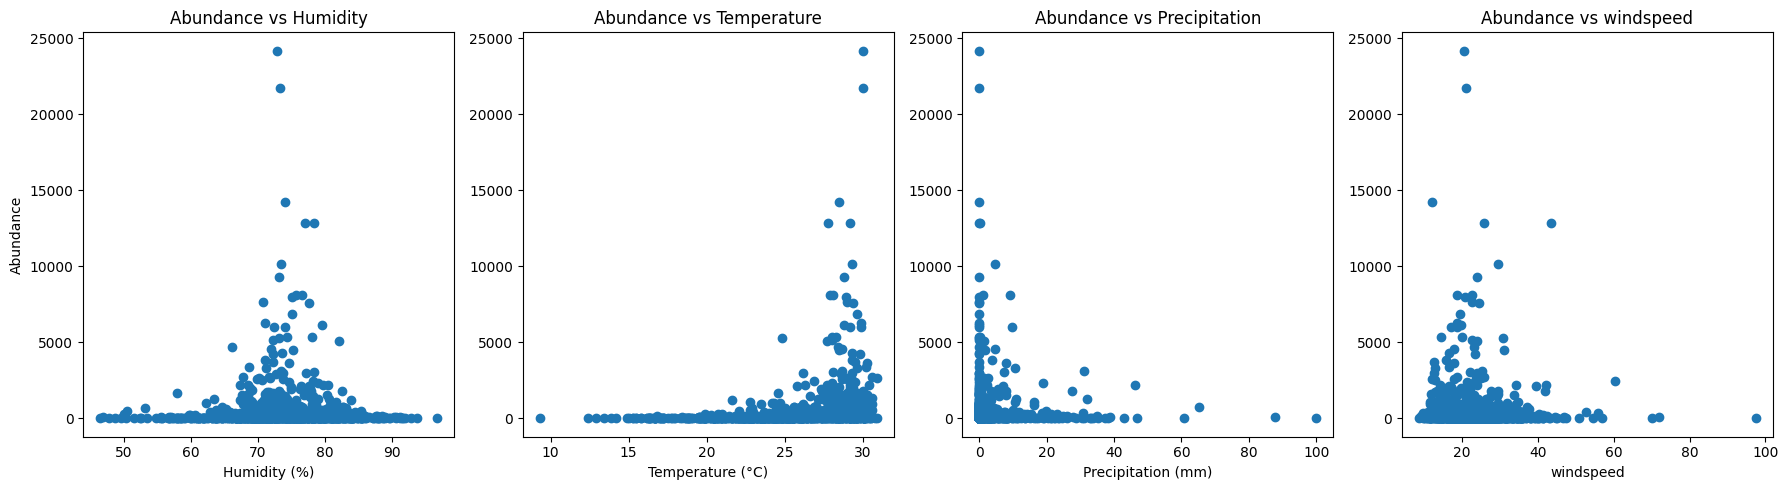

In [24]:

# Scatter plots
fig, axes = plt.subplots(1, 4, figsize=(18, 5))
axes[0].scatter(df['humidity'], df['abundance'])
axes[0].set_title('Abundance vs Humidity')
axes[0].set_xlabel('Humidity (%)')
axes[0].set_ylabel('Abundance')

axes[1].scatter(df['temp'], df['abundance'])
axes[1].set_title('Abundance vs Temperature')
axes[1].set_xlabel('Temperature (°C)')

axes[2].scatter(df['precip'], df['abundance'])
axes[2].set_title('Abundance vs Precipitation')
axes[2].set_xlabel('Precipitation (mm)')

axes[3].scatter(df['windspeed'], df['abundance'])
axes[3].set_title('Abundance vs windspeed')
axes[3].set_xlabel('windspeed')
plt.tight_layout()
plt.show()

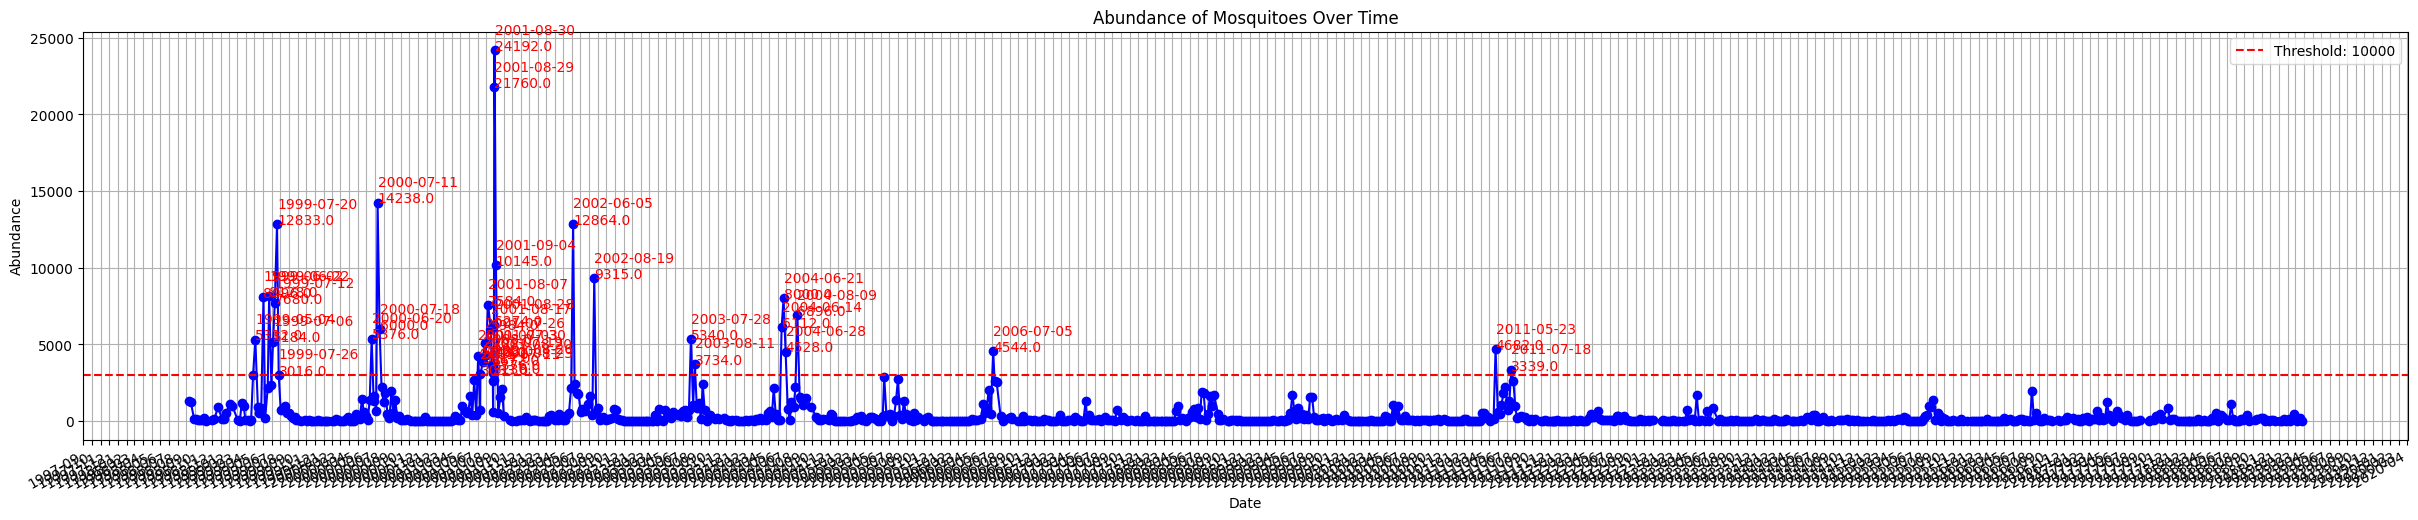

In [25]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Example DataFrame
# Ensure df['Date'] is converted to datetime if not already
df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(30, 6))

# Plot 'abundance' data
plt.plot(df['Date'], df['abundance'], marker='o', linestyle='-', color='blue')

# Add a horizontal red dashed line at y=10000
plt.axhline(y=3000, color='r', linestyle='--', label='Threshold: 10000')

# Annotate points above 10000
for i, row in df.iterrows():
    if row['abundance'] > 3000:
        plt.text(row['Date'], row['abundance'], f"{row['Date'].strftime('%Y-%m-%d')}\n{row['abundance']}", color='red')

# Set legend
plt.legend()

# Set title and axis labels
plt.title('Abundance of Mosquitoes Over Time')
plt.xlabel('Date')
plt.ylabel('Abundance')

# Format x-axis to show month and year
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Locate months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format months

# Improve layout to not cut off dates
plt.gcf().autofmt_xdate()  # Auto format to prevent overlap

# Show grid
plt.grid(True)

# Display the plot
plt.show()


In [26]:
df

,Date,abundance,humidity,temp,precip,windspeed,humidity_lag4,temp_lag4,precip_lag3,windspeed_lag1
4,1998-09-10,1336.0,78.1,29.4,2.554,23.0,73.1,29.5,0.000,22.3
5,1998-09-17,1232.0,83.8,28.2,3.420,26.3,70.4,29.9,0.000,23.0
6,1998-09-29,104.0,72.1,28.3,0.000,18.7,73.0,29.7,0.300,26.3
7,1998-10-06,123.0,73.7,29.2,0.000,24.5,73.4,29.8,2.554,18.7
8,1998-10-13,54.0,77.1,27.4,8.023,16.6,78.1,29.4,3.420,24.5
...,...,...,...,...,...,...,...,...,...,...
993,2019-02-25,435.0,75.3,26.3,0.000,23.8,69.4,16.3,0.000,20.0
994,2019-03-05,23.0,74.8,25.6,0.000,27.7,67.4,24.0,1.818,23.8
995,2019-03-11,39.0,71.3,26.8,0.000,19.2,73.5,25.9,0.000,27.7
996,2019-03-18,227.0,73.2,25.4,0.000,19.6,80.3,27.0,0.000,19.2


cross_validation
shuffle the data

# LSTM model

Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


737/737 - 1s - 1ms/step - loss: 0.0435
Epoch 2/100
737/737 - 1s - 810us/step - loss: 0.0387
Epoch 3/100
737/737 - 1s - 779us/step - loss: 0.0361
Epoch 4/100
737/737 - 1s - 753us/step - loss: 0.0365
Epoch 5/100
737/737 - 1s - 779us/step - loss: 0.0349
Epoch 6/100
737/737 - 1s - 782us/step - loss: 0.0342
Epoch 7/100
737/737 - 1s - 799us/step - loss: 0.0342
Epoch 8/100
737/737 - 1s - 827us/step - loss: 0.0342
Epoch 9/100
737/737 - 1s - 781us/step - loss: 0.0347
Epoch 10/100
737/737 - 1s - 868us/step - loss: 0.0335
Epoch 11/100
737/737 - 1s - 832us/step - loss: 0.0333
Epoch 12/100
737/737 - 1s - 823us/step - loss: 0.0328
Epoch 13/100
737/737 - 1s - 892us/step - loss: 0.0320
Epoch 14/100
737/737 - 1s - 791us/step - loss: 0.0326
Epoch 15/100
737/737 - 1s - 859us/step - loss: 0.0328
Epoch 16/100
737/737 - 1s - 797us/step - loss: 0.0323
Epoch 17/100
737/737 - 1s - 820us/step - loss: 0.0320
Epoch 18/100
737/737 - 1s - 829us/step - loss: 0.0319
Epoch 19/100
737/737 - 1s - 892us/step - loss: 0.03

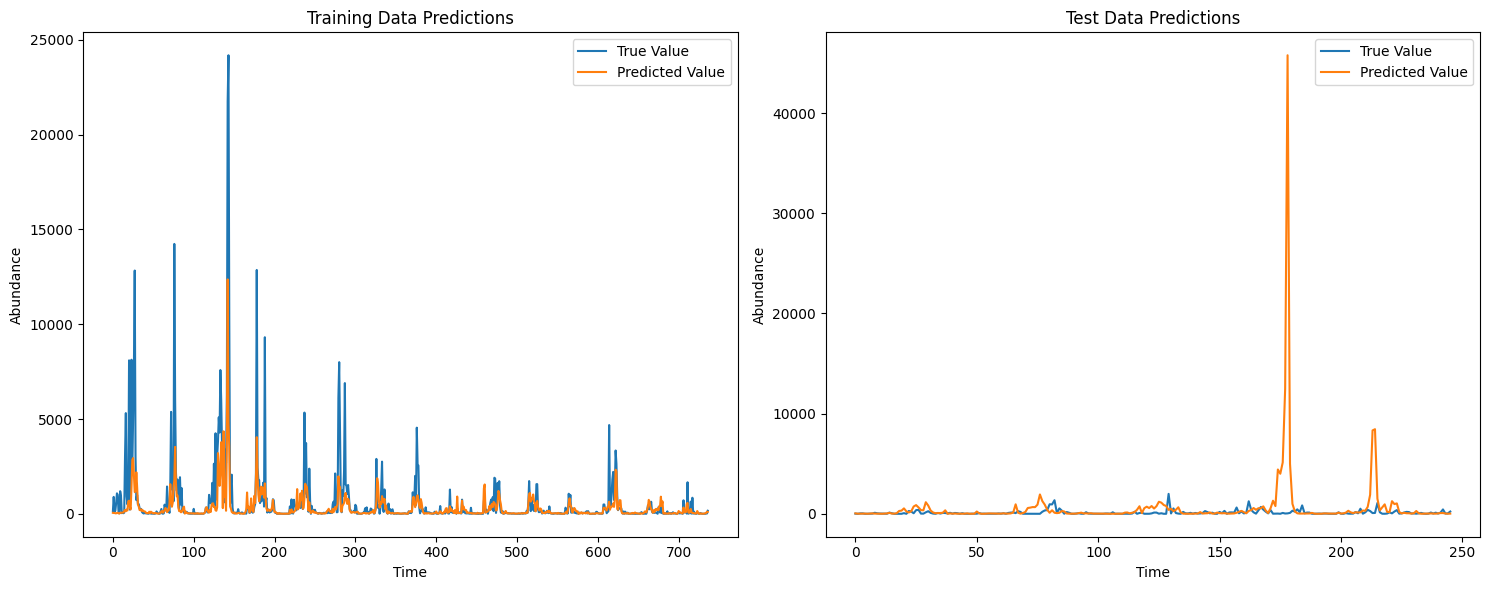

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 假设 df 是你的 DataFrame，包括 'humidity', 'temp', 'precip', 'abundance', 'windspeed' 列
# 确保所有数据是浮点类型
df = df[['humidity', 'temp', 'precip', 'abundance', 'windspeed']].astype('float32')

# 处理极值：对 abundance 列进行对数变换
df['abundance'] = np.log1p(df['abundance'])  # 使用 np.log1p 以避免 log(0) 问题

# 初始化两个 MinMaxScaler
feature_scaler = MinMaxScaler(feature_range=(0, 1))
target_scaler = MinMaxScaler(feature_range=(0, 1))

# 分别对特征和目标变量进行归一化
features = df[['humidity', 'temp', 'precip', 'windspeed']].values
target = df[['abundance']].values

scaled_features = feature_scaler.fit_transform(features)
scaled_target = target_scaler.fit_transform(target)

# 合并缩放后的特征和目标变量
scaled_data = np.hstack((scaled_features, scaled_target))

# 创建数据窗口
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        X.append(dataset[i:(i + look_back), 0:4])  # 使用前 4 列（humidity, temp, precip, windspeed）
        Y.append(dataset[i + look_back, 4])      # 第 5 列（abundance）为目标
    return np.array(X), np.array(Y)

look_back = 10
X, Y = create_dataset(scaled_data, look_back)
X = np.reshape(X, (X.shape[0], X.shape[1], X.shape[2]))  # 调整为 LSTM 输入格式

# 分割数据集为训练集和测试集
train_size = int(len(X) * 0.75)
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

# 构建 LSTM 模型
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 4)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# 训练模型
model.fit(X_train, Y_train, epochs=100, batch_size=1, verbose=2)

# 进行预测
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# 反归一化预测结果和真实值
train_predict = target_scaler.inverse_transform(train_predict)
test_predict = target_scaler.inverse_transform(test_predict)
Y_train = target_scaler.inverse_transform(Y_train.reshape(-1, 1))
Y_test = target_scaler.inverse_transform(Y_test.reshape(-1, 1))

# 反对数变换，将数据还原到原始范围
train_predict = np.expm1(train_predict)
test_predict = np.expm1(test_predict)
Y_train = np.expm1(Y_train)
Y_test = np.expm1(Y_test)

# 计算性能指标
train_mse = mean_squared_error(Y_train, train_predict)
train_mae = mean_absolute_error(Y_train, train_predict)
train_rmse = np.sqrt(train_mse)

test_mse = mean_squared_error(Y_test, test_predict)
test_mae = mean_absolute_error(Y_test, test_predict)
test_rmse = np.sqrt(test_mse)

# 打印结果
print(f'Training Data MSE: {train_mse}')
print(f'Training Data MAE: {train_mae}')
print(f'Training Data RMSE: {train_rmse}')
print(f'Test Data MSE: {test_mse}')
print(f'Test Data MAE: {test_mae}')
print(f'Test Data RMSE: {test_rmse}')

# 可视化
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(Y_train, label='True Value')
plt.plot(train_predict, label='Predicted Value')
plt.title('Training Data Predictions')
plt.xlabel('Time')
plt.ylabel('Abundance')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Y_test, label='True Value')
plt.plot(test_predict, label='Predicted Value')
plt.title('Test Data Predictions')
plt.xlabel('Time')
plt.ylabel('Abundance')
plt.legend()

plt.tight_layout()
plt.show()


In [28]:
# 计算测试集的残差
residuals_test = Y_test - test_predict

# 输出残差
print("Test residuals:", residuals_test)

Test residuals: [[-2.62003403e+01]
 [-1.04319830e+01]
 [ 2.38424759e+01]
 [ 2.85120010e+01]
 [-1.94314919e+01]
 [-6.94051743e-01]
 [-2.24634171e+01]
 [-1.99325848e+01]
 [ 8.20959015e+01]
 [ 2.84190693e+01]
 [ 1.72362709e+01]
 [ 1.95162086e+01]
 [-4.92323017e+00]
 [-2.81729164e+01]
 [ 2.20564041e+01]
 [ 3.09517784e+01]
 [-1.63138485e+01]
 [-5.47997322e+01]
 [-2.73552032e+02]
 [-3.16452087e+02]
 [-4.74552124e+02]
 [-2.38805893e+02]
 [ 1.49226166e+02]
 [-3.42302551e+01]
 [-6.74667786e+02]
 [-5.03365021e+02]
 [-2.43576904e+02]
 [-3.46004822e+02]
 [-3.33949127e+02]
 [-1.00678467e+03]
 [-5.60205688e+02]
 [-2.33367828e+02]
 [-1.09098999e+02]
 [-5.49361229e+01]
 [ 1.89807968e+01]
 [-5.27401123e+01]
 [-1.80317230e+01]
 [-2.70295288e+02]
 [ 3.45608177e+01]
 [ 6.17116547e+01]
 [ 1.19796753e+00]
 [ 5.47865143e+01]
 [ 4.47344284e+01]
 [-6.87471390e+00]
 [ 5.20655937e+01]
 [-4.23971844e+00]
 [-4.17811470e+01]
 [-3.87776208e+00]
 [ 6.78160572e+00]
 [-1.13535690e+00]
 [-2.14389374e+02]
 [ 2.99241867e+

In [29]:
residuals_test

array([[-2.62003403e+01],
       [-1.04319830e+01],
       [ 2.38424759e+01],
       [ 2.85120010e+01],
       [-1.94314919e+01],
       [-6.94051743e-01],
       [-2.24634171e+01],
       [-1.99325848e+01],
       [ 8.20959015e+01],
       [ 2.84190693e+01],
       [ 1.72362709e+01],
       [ 1.95162086e+01],
       [-4.92323017e+00],
       [-2.81729164e+01],
       [ 2.20564041e+01],
       [ 3.09517784e+01],
       [-1.63138485e+01],
       [-5.47997322e+01],
       [-2.73552032e+02],
       [-3.16452087e+02],
       [-4.74552124e+02],
       [-2.38805893e+02],
       [ 1.49226166e+02],
       [-3.42302551e+01],
       [-6.74667786e+02],
       [-5.03365021e+02],
       [-2.43576904e+02],
       [-3.46004822e+02],
       [-3.33949127e+02],
       [-1.00678467e+03],
       [-5.60205688e+02],
       [-2.33367828e+02],
       [-1.09098999e+02],
       [-5.49361229e+01],
       [ 1.89807968e+01],
       [-5.27401123e+01],
       [-1.80317230e+01],
       [-2.70295288e+02],
       [ 3.4

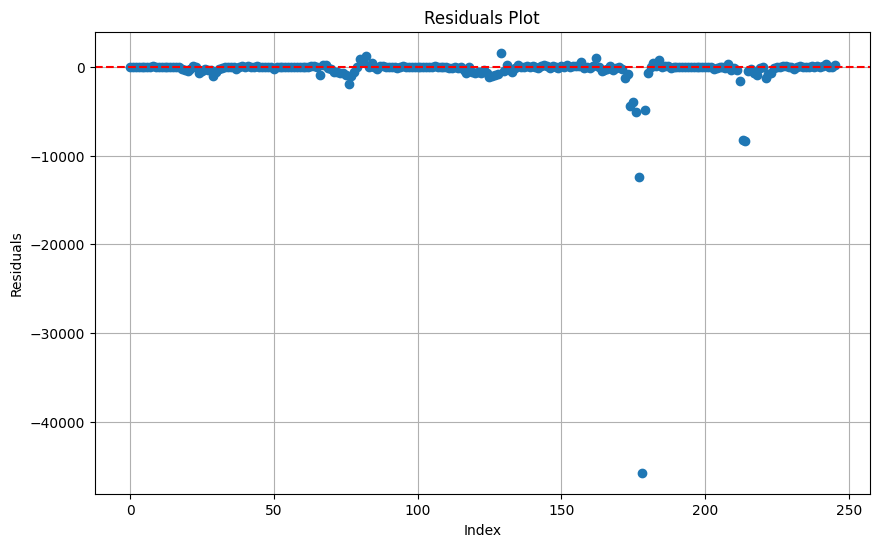

In [ ]:
import matplotlib.pyplot as plt

# residuals_test 是一个  Numpy 数组，包含模型的预测残差
plt.figure(figsize=(10, 6))  # 设置图形的尺寸
plt.plot(residuals_test, marker='o', linestyle='')  # 使用圆圈标记每个点，不连接线条
plt.title('Residuals Plot')  # 设置图形标题
plt.xlabel('Index')  # 设置x轴标签
plt.ylabel('Residuals')  # 设置y轴标签
plt.axhline(y=0, color='r', linestyle='--')  # 画一条红色虚线在y=0
plt.grid(True)  # 显示网格
plt.show()

# Validate model on other dataset

In [31]:
houston = pd.read_csv('https://raw.githubusercontent.com/Zhengnan817/capstone/main/Dataset/paperdata_houston_final.csv')
vitoria = pd.read_csv('https://raw.githubusercontent.com/Zhengnan817/capstone/main/Dataset/vitoria_dataset_final.csv')

In [32]:
vitoria.tail(40)

,datetime,Cases,population,population_2d,population_3d,precip,humidity,temp,windspeed,lw_avg_temp,lw_avg_humidity,lw_precip
203,2011_47,99.0,637.75,311.0,293.000000,1.0,85.242857,24.528571,27.971429,24.195238,80.428571,7.9
204,2011_48,82.0,543.50,249.5,320.333333,19.5,88.071429,23.542857,23.028571,23.795238,85.019048,27.4
205,2011_49,104.0,430.25,359.5,561.666667,61.2,85.314286,24.914286,24.614286,24.328571,86.209524,81.7
206,2011_50,102.0,335.25,714.0,1006.333333,14.9,80.900000,25.800000,29.000000,24.752381,84.761905,95.6
207,2011_51,66.0,481.75,1278.5,1036.333333,0.1,73.228571,27.157143,34.157143,25.957143,79.814286,76.2
208,2011_52,47.0,819.00,1071.5,822.000000,3.8,79.571429,25.842857,24.900000,26.266667,77.900000,18.8
209,2012_01,84.0,892.75,437.5,553.000000,203.6,87.885714,24.685714,22.571429,25.895238,80.228571,207.5
210,2012_02,91.0,858.00,553.5,809.000000,83.0,82.114286,26.157143,29.171429,25.561905,83.190476,290.4
211,2012_03,77.0,812.50,1052.0,1011.666667,3.0,72.171429,27.185714,31.728571,26.009524,80.723810,289.6
212,2012_04,86.0,744.75,1125.5,1080.333333,0.0,71.757143,27.285714,32.757143,26.876190,75.347619,86.0


In [33]:
houston

,date,population,population_2d,population_3d,precip,humidity,temp,windspeed,lw_avg_temp,lw_avg_humidity,lw_precip
0,2018_22,NaN,11100000.0,1.223333e+07,0.000,78.885714,28.285714,23.685714,26.804762,80.333333,91.555
1,2018_23,NaN,13250000.0,1.416667e+07,0.094,77.600000,28.385714,21.328571,27.385714,81.038095,91.635
2,2018_24,NaN,15250000.0,1.450000e+07,58.442,80.200000,28.257143,27.085714,28.309524,78.895238,58.536
3,2018_25,13175000.0,14500000.0,1.393333e+07,35.820,89.314286,27.257143,22.628571,27.966667,82.371429,94.356
4,2018_26,13875000.0,12900000.0,1.340000e+07,8.528,79.600000,29.114286,22.585714,28.209524,83.038095,102.790
5,2018_27,14075000.0,13600000.0,1.370000e+07,174.854,83.185714,27.457143,22.500000,27.942857,84.033333,219.202
6,2018_28,14050000.0,14150000.0,1.376667e+07,14.410,79.142857,28.814286,20.557143,28.461905,80.642857,197.792
7,2018_29,13525000.0,13450000.0,1.330000e+07,0.000,76.242857,29.985714,21.914286,28.752381,79.523810,189.264
8,2018_30,13525000.0,13000000.0,1.350000e+07,0.000,68.728571,30.271429,19.271429,29.690476,74.704762,14.410
9,2018_31,13575000.0,13750000.0,1.390000e+07,7.690,75.857143,28.557143,24.571429,29.604762,73.609524,7.690


In [34]:
# 手动解析日期格式
def parse_date(year_week_str):
    year, week = map(int, year_week_str.split('_'))
    return pd.to_datetime(f'{year}-W{week}-1', format='%Y-W%W-%w')

houston['date'] = houston['date'].apply(parse_date)
vitoria['datetime'] = vitoria['datetime'].apply(parse_date)

In [35]:
houston = houston.set_index('date').resample('W').mean().reset_index()
vitoria = vitoria.set_index('datetime').resample('W').mean().reset_index()
houston = houston[['date','population', 'humidity', 'temp', 'precip','windspeed']]
vitoria = vitoria[['datetime','population', 'humidity', 'temp', 'precip','windspeed']]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step


/var/folders/bz/shq74ng152xd2xvygh6vtv940000gn/T/ipykernel_1100/652128939.py:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill').fillna(method='bfill')
/var/folders/bz/shq74ng152xd2xvygh6vtv940000gn/T/ipykernel_1100/652128939.py:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill').fillna(method='bfill')


Houston Mean Squared Error:  53287520616325.28
Houston Mean Absolute Error:  5621590.53028109
Houston Root Mean Squared Error:  7299830.177225035
Vitoria Mean Squared Error:  558486.0838528185
Vitoria Mean Absolute Error:  695.2592538557947
Vitoria Root Mean Squared Error:  747.3192650084825


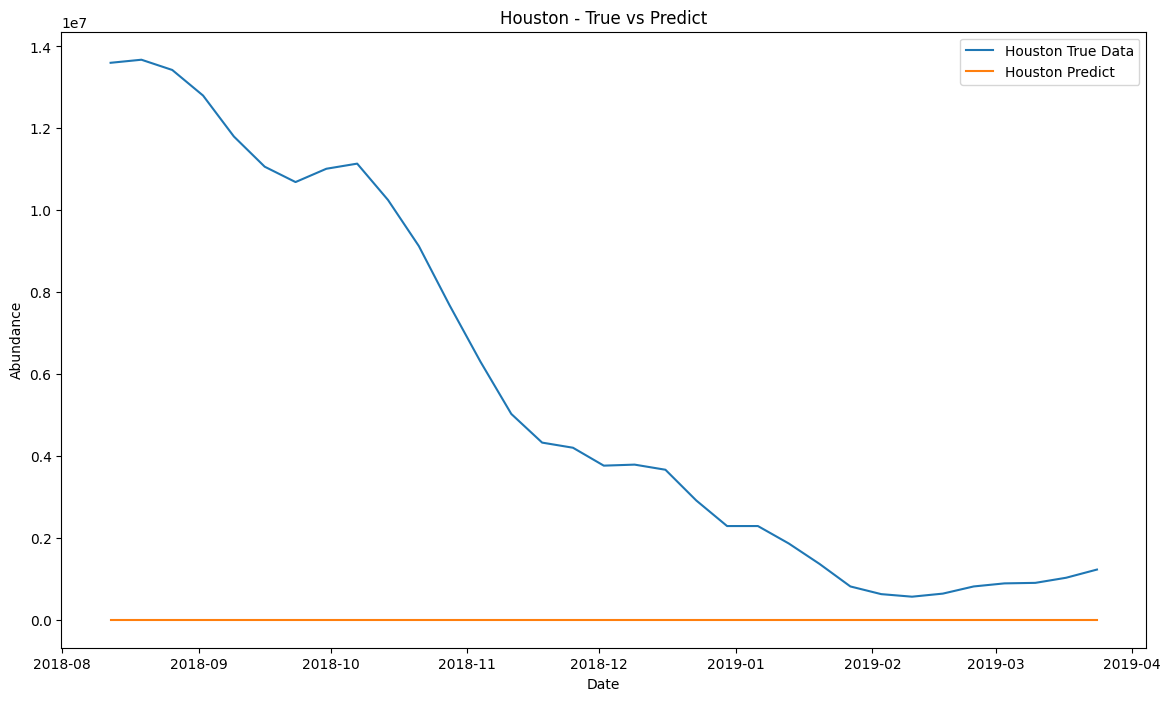

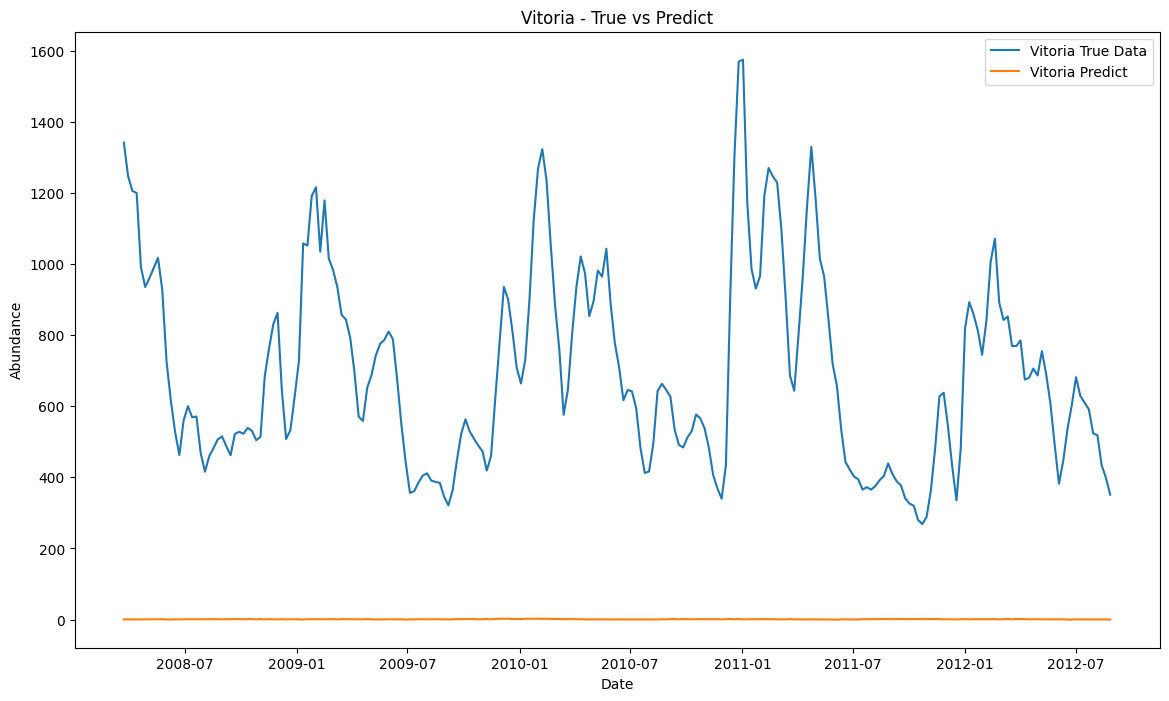

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 假设 houston 和 vitoria 数据集已经加载到 DataFrame 中
# houston 和 vitoria 的列假设包括：['date', 'humidity', 'temp', 'precip', 'abundance', 'windspeed']
# 确保 'date' 列是 datetime 类型
houston['date'] = pd.to_datetime(houston['date'])
vitoria['date'] = pd.to_datetime(vitoria['datetime'])

# 重命名 'population' 列为 'abundance'
houston = houston.rename(columns={'population': 'abundance'})
vitoria = vitoria.rename(columns={'population': 'abundance'})

# 数据预处理函数
def preprocess_data(df, look_back):
    # 确保数据按日期排序
    df = df.sort_values('date')
    
    # 缺失值处理（如果有）
    df = df.fillna(method='ffill').fillna(method='bfill')
    
    # 转换为 NumPy 数组
    data = df[['humidity', 'temp', 'precip', 'abundance', 'windspeed']].values

    # 创建数据窗口
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), [0, 1, 2, 4]])  # 选择 humidity, temp, precip, windspeed
        y.append(data[i + look_back, 3])  # abundance
    X = np.array(X)
    y = np.array(y)
    return X, y

# 设置窗口大小
look_back = 10

# 处理 houston 数据集
X_houston, houston_true = preprocess_data(houston, look_back)

# 处理 vitoria 数据集
X_vitoria, vitoria_true = preprocess_data(vitoria, look_back)

# 使用模型进行预测
houston_predict = model.predict(X_houston)
vitoria_predict = model.predict(X_vitoria)

# 计算预测误差
mse_houston = mean_squared_error(houston_true, houston_predict)
mae_houston = mean_absolute_error(houston_true, houston_predict)
rmse_houston = np.sqrt(mse_houston)

mse_vitoria = mean_squared_error(vitoria_true, vitoria_predict)
mae_vitoria = mean_absolute_error(vitoria_true, vitoria_predict)
rmse_vitoria = np.sqrt(mse_vitoria)

print("Houston Mean Squared Error: ", mse_houston)
print("Houston Mean Absolute Error: ", mae_houston)
print("Houston Root Mean Squared Error: ", rmse_houston)
print("Vitoria Mean Squared Error: ", mse_vitoria)
print("Vitoria Mean Absolute Error: ", mae_vitoria)
print("Vitoria Root Mean Squared Error: ", rmse_vitoria)

# 绘制 Houston 预测结果
plt.figure(figsize=(14, 8))
plt.plot(houston['date'][look_back:], houston_true, label='Houston True Data')
plt.plot(houston['date'][look_back:], houston_predict, label='Houston Predict')
plt.title('Houston - True vs Predict')
plt.xlabel('Date')
plt.ylabel('Abundance')
plt.legend()
plt.show()

# 绘制 Vitoria 预测结果
plt.figure(figsize=(14, 8))
plt.plot(vitoria['date'][look_back:], vitoria_true, label='Vitoria True Data')
plt.plot(vitoria['date'][look_back:], vitoria_predict, label='Vitoria Predict')
plt.title('Vitoria - True vs Predict')
plt.xlabel('Date')
plt.ylabel('Abundance')
plt.legend()
plt.show()